<a href="https://colab.research.google.com/github/arockiasachin/ContextualFinAi/blob/main/LLMAgents_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
import os


# Assume the main CSV file is named "housing.csv"
dataset_file = "/content/housing.csv"
# Load the dataset
if os.path.exists(dataset_file):
    data = pd.read_csv(dataset_file)

    # Split the dataset into train and test sets
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

    # Define the save path
    save_path = "/content/data"
    os.makedirs(save_path, exist_ok=True)

    # Save the train and test sets
    train_file = os.path.join(save_path, "train.csv")
    test_file = os.path.join(save_path, "test.csv")

    train_data.to_csv(train_file, index=False)
    test_data.to_csv(test_file, index=False)

    print(f"Training data saved to: {train_file}")
    print(f"Testing data saved to: {test_file}")
else:
    print("Dataset file not found. Please check the dataset path and file name.")


Training data saved to: /content/data/train.csv
Testing data saved to: /content/data/test.csv


In [ ]:
# code
df = pd.read_csv('/content/data/train.csv')


In [ ]:
# print first 5 rows of dataframe

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [ ]:
# calculate total null values in every column
df.isna().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
!pip install h2o

In [ ]:
# install and import H2o ! pip install h2o
import h2o
# We will be using default parameter Here with H2O init method
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 8 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 24 days
H2O_cluster_name:,H2O_from_python_unknownUser_vr8rlw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.960 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# convert pandas DataFrame into H2O Frame
train_df = h2o.H2OFrame(df)
# Describe the train h20Frame
train_df.describe()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:16512
Cols:10

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
type,real,real,int,int,int,int,int,real,int,enum
mins,-124.35,32.55,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0,
mean,-119.58229045542669,35.64314922480625,28.60828488372099,2642.0047843992133,538.4968507751933,1426.4530038759654,499.9869186046511,3.880754257509685,207194.69373788836,
maxs,-114.31,41.95,52.0,39320.0,6445.0,35682.0,6082.0,15.0001,500001.0,
sigma,2.0056535406966307,2.1366652963995922,12.602499352253918,2174.6467436367816,419.0070958700483,1137.0563797810282,380.96796387145446,1.9042939225591968,115622.62644809157,
zeros,0,0,0,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN


In [ ]:
# code
test = pd.read_csv('/content/data/test.csv')
test = h2o.H2OFrame(test)
# selecting feature and label columns

x = test.columns
y = 'median_house_value'
# remove label classvariable from feature variable
x.remove(y)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# import autoML from H2O
from h2o.automl import H2OAutoML
# callh20automl function
from h2o.automl import H2OAutoML

aml = H2OAutoML(
    max_runtime_secs=3600,  # Allow more time for model exploration
    stopping_metric='RMSE',  # Focus on minimizing Root Mean Squared Error
    stopping_tolerance=0.0001,  # Require very small improvements for early stopping
    stopping_rounds=5,  # Stop if no improvement for 5 rounds
    nfolds=5,  # Use 5-fold cross-validation for better generalization
    balance_classes=False,  # Not needed as this is a regression task
    keep_cross_validation_predictions=True,  # Required for Stacked Ensembles
    #include_algos=['GBM', 'XGBoost', 'StackedEnsemble'],  # Focus on tree-based methods and ensembles
    exclude_algos=['DeepLearning'],  # Exclude slower models unlikely to outperform in this case
    max_models=50,  # Limit the total number of models
    seed=42,  # Ensure reproducibility
    project_name="California_Housing"  # Custom project name
)
aml.train(x=x, y=y, training_frame=train_df)

# train model and record time % time
aml.train(x = x, y = y, training_frame = train_df)

AutoML progress: |
14:01:31.624: Stopping tolerance set by the user is < 70% of the recommended default of 0.007782160079558629, so models may take a long time to converge or may not converge at all.

███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
14:01:31.624: Stopping tolerance set by the user is < 70% of the recommended default of 0.007782160079558629, so models may take a long time to converge or may not converge at all.
14:55:29.799: Stopping tolerance set by the user is < 70% of the recommended default of 0.007782160079558629, so models may take a long time to converge or may not converge at all.
14:55:29.800: New models will be added to existing leaderboard California_Housing@@median_house_value (leaderboard frame=null) with already 52 models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),16/50
# GBM base models (used / total),4/20
# XGBoost base models (used / total),12/27
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
# View the H2O aml leaderboard
lb = aml.leaderboard
# Print all rows instead of 10 rows
lb.head(rows = lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20241226_140131,44276.1,1.96037e+09,28763,0.216803,1.96037e+09
StackedEnsemble_AllModels_2_AutoML_4_20241226_145529,44277.2,1.96047e+09,28766.5,0.216812,1.96047e+09
StackedEnsemble_BestOfFamily_1_AutoML_3_20241226_140131,44908.9,2.01681e+09,29382.5,0.220573,2.01681e+09
StackedEnsemble_BestOfFamily_2_AutoML_4_20241226_145529,44908.9,2.01681e+09,29382.5,0.220573,2.01681e+09
GBM_grid_1_AutoML_3_20241226_140131_model_11,45640,2.08301e+09,30257.8,0.225374,2.08301e+09
GBM_grid_2_AutoML_4_20241226_145529_model_11,45640,2.08301e+09,30257.8,0.225374,2.08301e+09
GBM_grid_1_AutoML_3_20241226_140131_model_9,46062.3,2.12174e+09,30529.8,0.228354,2.12174e+09
GBM_grid_2_AutoML_4_20241226_145529_model_9,46062.3,2.12174e+09,30529.8,0.228354,2.12174e+09
GBM_3_AutoML_3_20241226_140131,46231.4,2.13734e+09,30358.4,0.229095,2.13734e+09
GBM_8_AutoML_4_20241226_145529,46231.4,2.13734e+09,30358.4,0.229095,2.13734e+09


In [ ]:
# Get the top model of leaderboard
se = aml.leader

# Get the metalearner model of top model
metalearner = h2o.get_model(se.metalearner()['name'])

# list baselearner models :
metalearner.varimp()


/usr/local/lib/python3.10/dist-packages/h2o/estimators/stackedensemble.py:965: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


[('GBM_grid_1_AutoML_3_20241226_140131_model_11',
  23463.232421875,
  1.0,
  0.2173775176611246),
 ('GBM_grid_1_AutoML_3_20241226_140131_model_9',
  13834.9189453125,
  0.589642496675525,
  0.12817502223483354),
 ('XGBoost_grid_1_AutoML_3_20241226_140131_model_5',
  11981.2080078125,
  0.5106375708336889,
  0.11100112757233395),
 ('XGBoost_grid_1_AutoML_3_20241226_140131_model_14',
  11240.40234375,
  0.47906452707131963,
  0.10413785769426408),
 ('XGBoost_grid_1_AutoML_3_20241226_140131_model_23',
  10073.0927734375,
  0.4293139407359004,
  0.09332319873448518),
 ('XGBoost_grid_1_AutoML_3_20241226_140131_model_16',
  5772.24951171875,
  0.24601254456045135,
  0.053477596250047714),
 ('XGBoost_grid_1_AutoML_3_20241226_140131_model_11',
  5014.88134765625,
  0.21373360914162992,
  0.04646088139596056),
 ('XGBoost_grid_1_AutoML_3_20241226_140131_model_20',
  4878.8369140625,
  0.20793541257827344,
  0.045200483820106864),
 ('XGBoost_3_AutoML_3_20241226_140131',
  4735.740234375,
  0.201

In [ ]:
h2o.get_model??

In [ ]:
# model performance on test dataset
model = h2o.get_model('XGBoost_grid_1_AutoML_3_20241226_140131_model_9')
model.model_performance(test)


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 2507436223.5333014
RMSE: 50074.3070200008
MAE: 33691.845647767535
RMSLE: 0.2538448869673827
Mean Residual Deviance: 2507436223.5333014

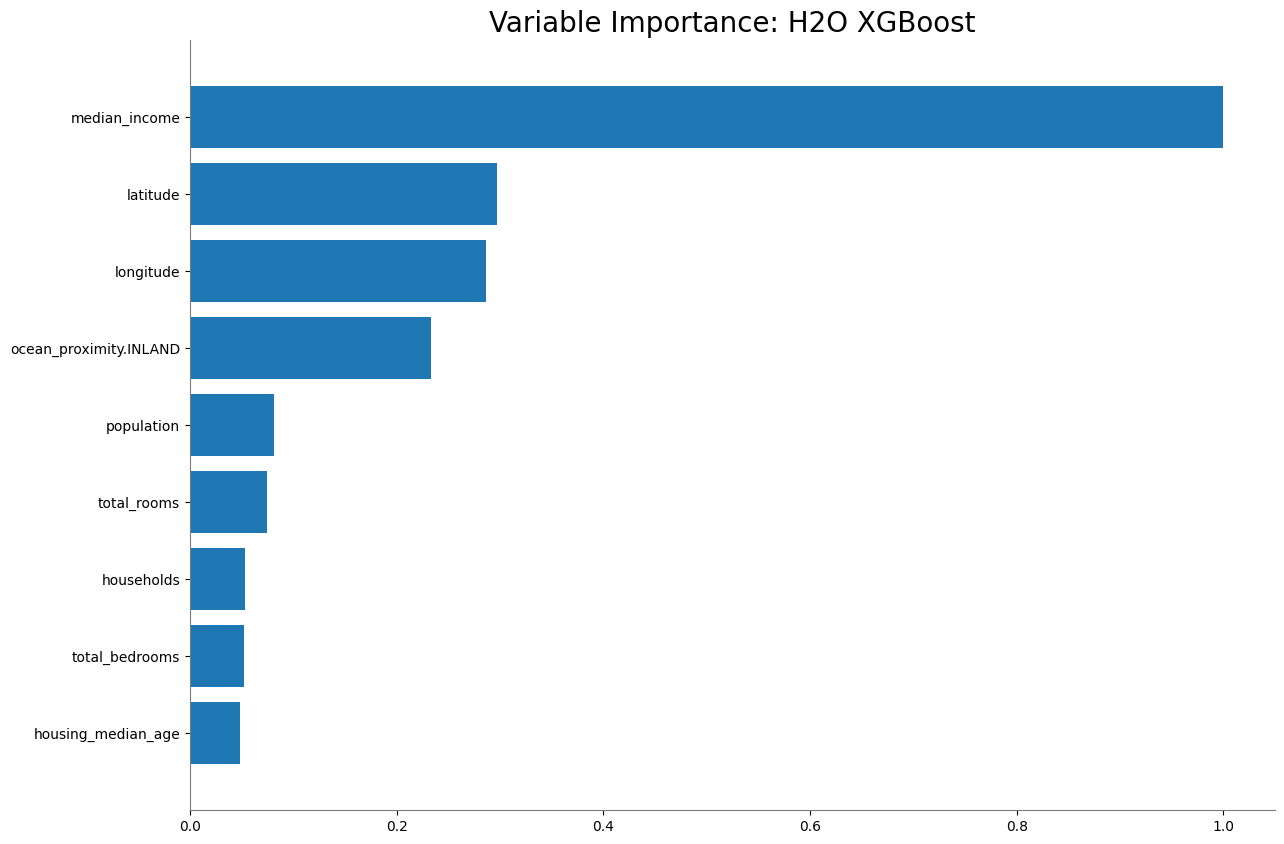

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the graph for variable importance
model.varimp_plot(num_of_features = 9)


In [ ]:
best_model = h2o.get_model("StackedEnsemble_AllModels_3_AutoML_1_20241226_114236")
predictions = best_model.predict(top_row)
print(predictions)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
  predict
  46690.7
[1 row x 1 column]



In [ ]:
predictions_df = predictions.as_data_frame()
predictions_df

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning:Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)



Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
# sAVE THE BASELEARNER MODEL
model_path = h2o.save_model(model = model, path ='/content/model', force = True)

In [ ]:
!pip install lux-api

In [ ]:
import lux
import pandas as pd

In [ ]:
df = pd.read_csv("/content/housing.csv")
df

/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/usr/local/lib/python3.10/dist-packages/lux/core/groupby.py:29: FutureWarning:The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/usr/local/lib/python3.10/dist-packages/lux/core/groupby.py:29: FutureWarning:The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/usr/local/lib/python3.10/dist-packages/lux/core/groupby.py:29: FutureWarning:The default of observed=False is deprecated and will be changed t

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
df.intent = ["AverageCost","SATAverage"]
df

/usr/local/lib/python3.10/dist-packages/lux/core/frame.py:257: UserWarning:
The following issues are ecountered when validating the parsed intent:
- The input attribute 'AverageCost' does not exist in the DataFrame. 
  Please check your input intent for typos.
- The input attribute 'SATAverage' does not exist in the DataFrame. 
  Please check your input intent for typos.
/usr/local/lib/python3.10/dist-packages/lux/core/groupby.py:29: FutureWarning:The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/usr/local/lib/python3.10/dist-packages/lux/core/groupby.py:29: FutureWarning:The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/usr/local/lib/python3.10/di

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
df.intent = ["AverageCost","SATAverage"]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Demo

In [ ]:
os.environ["GOOGLE_API_KEY"] = "API KEY here"

In [ ]:
pip install langchain streamlit h2o pandas langchain_openai langchain_google_genai google-generativeai streamlit pyngrok gradio


In [ ]:
user_inputs = {
    "longitude": "longitude",
    "latitude": "latitude",
    "housing_median_age": "housing_median_age",
    "total_rooms": "total_rooms",
    "total_bedrooms": "total_bedrooms",
    "population": "population",
    "households": "households",
    "median_income": "median_income",
    "ocean_proximity": "ocean_proximity",
}
user_inputs["households"]

'households'

In [ ]:
import gradio as gr
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_google_genai import ChatGoogleGenerativeAI
import google.generativeai as genai
import os

# Initialize H2O
h2o.init()

# Load the trained H2O model
model_id = "XGBoost_grid_1_AutoML_3_20241226_140131_model_9"
model = h2o.get_model(model_id)

# Configure Google Generative AI
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))
gemini_llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

# Define a function to make predictions
def predict_house_value(inputs):
    """Predicts house value based on user inputs."""
    input_df = pd.DataFrame([inputs])
    input_h2o = h2o.H2OFrame(input_df)
    predictions = model.predict(input_h2o)
    predicted_value = predictions.as_data_frame().iloc[0, 0]
    return predicted_value

# Define the prompt template for explanation
prompt_template = PromptTemplate(
    input_variables=["features", "prediction"],
    template=(
        "Given the following features for a property: {features}, "
        "the machine learning model predicted a median house value of ${prediction:.2f}. "
        "This prediction was made using the California Housing Price dataset, which contains "
        "information on housing characteristics and demographics from California.\n\n"
        "### Explanation:\n"
        "1. **Feature Contribution**:\n"
        "   - Analyze the influence of individual features on this prediction. For instance:\n"
        "     - **Longitude and Latitude**: Indicate the property's geographic location. Proximity to desirable areas (e.g., coastlines or urban centers) increases the predicted price.\n"
        "     - **Ocean Proximity**: `ocean_proximity` suggests how close the property is to the ocean, with 'NEAR BAY' or 'NEAR OCEAN' typically leading to higher prices.\n"
        "     - **Median Income**: A value of `median_income` reflects the income level of the area, which often correlates strongly with housing prices.\n"
        "     - **Housing Median Age**: Indicates the average age of homes in the area. Older homes may have historical value or require renovations.\n"
        "     - **Rooms and Population**: `total_rooms`, `total_bedrooms`, `households`, and `population` collectively reflect the area's density and housing capacity. These interact to influence the price prediction.\n"
        "2. **Geographic Trends**:\n"
        "   - The model has learned geographic trends from the dataset, identifying regions with higher or lower average housing prices. Properties in high-demand areas naturally command higher values.\n"
        "3. **Dataset Context**:\n"
        "   - The California Housing Price dataset covers properties from various regions, capturing economic, geographic, and social factors that impact housing prices.\n\n"
        "Please provide a detailed breakdown of the factors above, describing their contribution to this prediction and any potential interactions between features."
    ),
)

# Create the LangChain LLMChain
chain = LLMChain(llm=gemini_llm, prompt=prompt_template)

# Define the Gradio function
def gradio_interface(longitude, latitude, housing_median_age, total_rooms, total_bedrooms,
                     population, households, median_income, ocean_proximity):
    """Handles user input, prediction, and explanation."""
    # Prepare the inputs
    user_inputs = {
        "longitude": longitude,
        "latitude": latitude,
        "housing_median_age": housing_median_age,
        "total_rooms": total_rooms,
        "total_bedrooms": total_bedrooms,
        "population": population,
        "households": households,
        "median_income": median_income,
        "ocean_proximity": ocean_proximity,
    }

    # Make prediction
    predicted_value = predict_house_value(user_inputs)

    # Generate explanation using LangChain
    features_str = ', '.join(f"{key}: {value}" for key, value in user_inputs.items())
    explanation = chain.run(features=features_str, prediction=predicted_value)

    return f"${predicted_value:.2f}", explanation

# Create Gradio Interface
with gr.Blocks() as demo:
    gr.Markdown("# California Housing Price Prediction with Explanation")
    gr.Markdown(
        """
        Enter the details about the property to predict its median value and receive an explanation of the prediction.
        Features include geographic location, number of rooms, population density, and proximity to the ocean.
        """
    )

    with gr.Row():
        longitude = gr.Number(label="Longitude", value=-122.23)
        latitude = gr.Number(label="Latitude", value=37.88)

    with gr.Row():
        housing_median_age = gr.Number(label="Housing Median Age", value=41)
        total_rooms = gr.Number(label="Total Rooms", value=880)

    with gr.Row():
        total_bedrooms = gr.Number(label="Total Bedrooms", value=129)
        population = gr.Number(label="Population", value=322)
        households = gr.Number(label="Households", value=126)

    with gr.Row():
        median_income = gr.Number(label="Median Income", value=8.3252)
        ocean_proximity = gr.Dropdown(
            label="Ocean Proximity",
            choices=["NEAR BAY", "NEAR OCEAN", "INLAND", "ISLAND", "1H OCEAN"],
            value="NEAR BAY"
        )

    predict_button = gr.Button("Predict")
    prediction_output = gr.Text(label="Predicted Median House Value")
    explanation_output = gr.Text(label="Explanation")

    predict_button.click(
        gradio_interface,
        inputs=[longitude, latitude, housing_median_age, total_rooms, total_bedrooms,
                population, households, median_income, ocean_proximity],
        outputs=[prediction_output, explanation_output]
    )

# Launch Gradio App
demo.launch(debug=True)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 hours 29 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 24 days
H2O_cluster_name:,H2O_from_python_unknownUser_vr8rlw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.027 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://216b06398db33aeb46.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Keyboard interruption in main thread... closing server.


KeyboardInterrupt: 

In [ ]:
import gradio as gr
import pandas as pd
import lux
import h2o
from h2o.automl import H2OAutoML
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_google_genai import ChatGoogleGenerativeAI
import google.generativeai as genai
import os
import matplotlib.pyplot as plt
from io import BytesIO
import base64

# Initialize H2O
h2o.init()

# Load the trained H2O model
model_id = "XGBoost_grid_1_AutoML_3_20241226_140131_model_9"
model = h2o.get_model(model_id)

# Configure Google Generative AI
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))
gemini_llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

# Define a function to make predictions
def predict_house_value(inputs):
    """Predicts house value based on user inputs."""
    input_df = pd.DataFrame([inputs])
    input_h2o = h2o.H2OFrame(input_df)
    predictions = model.predict(input_h2o)
    predicted_value = predictions.as_data_frame().iloc[0, 0]
    return predicted_value

# Define the prompt template for explanation
prompt_template = PromptTemplate(
    input_variables=["features", "prediction"],
    template=(
        "Given the following features for a property: {features}, "
        "the machine learning model predicted a median house value of ${prediction:.2f}. "
        "This prediction was made using the California Housing Price dataset, which contains "
        "information on housing characteristics and demographics from California.\n\n"
        "### Explanation:\n"
        "1. **Feature Contribution**:\n"
        "   - Analyze the influence of individual features on this prediction. For instance:\n"
        "     - **Longitude and Latitude**: Indicate the property's geographic location. Proximity to desirable areas (e.g., coastlines or urban centers) increases the predicted price.\n"
        "     - **Ocean Proximity**: `ocean_proximity` suggests how close the property is to the ocean, with 'NEAR BAY' or 'NEAR OCEAN' typically leading to higher prices.\n"
        "     - **Median Income**: A value of `median_income` reflects the income level of the area, which often correlates strongly with housing prices.\n"
        "     - **Housing Median Age**: Indicates the average age of homes in the area. Older homes may have historical value or require renovations.\n"
        "     - **Rooms and Population**: `total_rooms`, `total_bedrooms`, `households`, and `population` collectively reflect the area's density and housing capacity. These interact to influence the price prediction.\n"
        "2. **Geographic Trends**:\n"
        "   - The model has learned geographic trends from the dataset, identifying regions with higher or lower average housing prices. Properties in high-demand areas naturally command higher values.\n"
        "3. **Dataset Context**:\n"
        "   - The California Housing Price dataset covers properties from various regions, capturing economic, geographic, and social factors that impact housing prices.\n\n"
        "Please provide a detailed breakdown of the factors above, describing their contribution to this prediction and any potential interactions between features."
    ),
)

# Create the LangChain LLMChain
chain = LLMChain(llm=gemini_llm, prompt=prompt_template)

import tempfile

def generate_regression_plot(df):
    input_h2o = h2o.H2OFrame(df)
    predictions = model.predict(input_h2o)
    df["predicted_median_house_value"] = predictions.as_data_frame()["predict"]

    # Create regression plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df["median_house_value"], df["predicted_median_house_value"], alpha=0.5)
    plt.plot([df["median_house_value"].min(), df["median_house_value"].max()],
             [df["median_house_value"].min(), df["median_house_value"].max()],
             color="red", linestyle="--")
    plt.title("Predicted vs Actual Median House Values")
    plt.xlabel("Actual Median House Value")
    plt.ylabel("Predicted Median House Value")
    plt.grid(True)

    # Save plot to a temporary file
    temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False)
    plt.savefig(temp_file.name)
    temp_file.close()

    return temp_file.name


# Define the Gradio function
def gradio_interface(longitude, latitude, housing_median_age, total_rooms, total_bedrooms,
                     population, households, median_income, ocean_proximity):
    """Handles user input, prediction, explanation, and regression plot."""
    # Prepare the inputs
    user_inputs = {
        "longitude": longitude,
        "latitude": latitude,
        "housing_median_age": housing_median_age,
        "total_rooms": total_rooms,
        "total_bedrooms": total_bedrooms,
        "population": population,
        "households": households,
        "median_income": median_income,
        "ocean_proximity": ocean_proximity,
    }

    # Make prediction
    predicted_value = predict_house_value(user_inputs)

    # Generate explanation using LangChain
    features_str = ', '.join(f"{key}: {value}" for key, value in user_inputs.items())
    explanation = chain.run(features=features_str, prediction=predicted_value)

    # Generate regression plot
    plot_data = generate_regression_plot(df)

    return f"${predicted_value:.2f}", explanation, plot_data

# Create Gradio Interface
with gr.Blocks() as demo:
    gr.Markdown("# California Housing Price Prediction with Explanation and Regression Plot")
    gr.Markdown(
        """
        Enter the details about the property to predict its median value and receive an explanation of the prediction.
        Additionally, view a regression plot comparing predicted and actual house values.
        """
    )

    with gr.Accordion("Property Details", open=True):
        with gr.Row():
            longitude = gr.Number(label="Longitude", value=-122.23, info="Geographic coordinate for the property's location.")
            latitude = gr.Number(label="Latitude", value=37.88, info="Geographic coordinate for the property's location.")

        with gr.Row():
            housing_median_age = gr.Number(label="Housing Median Age", value=41, info="Median age of homes in the area.")
            total_rooms = gr.Number(label="Total Rooms", value=880, info="Total number of rooms in the property.")

        with gr.Row():
            total_bedrooms = gr.Number(label="Total Bedrooms", value=129, info="Total number of bedrooms in the property.")
            population = gr.Number(label="Population", value=322, info="Total population in the area.")
            households = gr.Number(label="Households", value=126, info="Total number of households in the area.")

        with gr.Row():
            median_income = gr.Number(label="Median Income", value=8.3252, info="Median income of households in the area.")
            ocean_proximity = gr.Dropdown(
                label="Ocean Proximity",
                choices=["NEAR BAY", "NEAR OCEAN", "INLAND", "ISLAND", "1H OCEAN"],
                value="NEAR BAY",
                info="Proximity of the property to the ocean."
            )

    predict_button = gr.Button("Predict")

    with gr.Row():
        with gr.Column():
            gr.Markdown("### Prediction Result")
            prediction_output = gr.Text(label="Predicted Median House Value", interactive=False)
        with gr.Column():
            gr.Markdown("### Explanation")
            explanation_output = gr.Text(label="Explanation", interactive=False)

    with gr.Row():
        gr.Markdown("### Regression Plot")
        regression_plot = gr.Image(label="Predicted vs Actual Values")

    predict_button.click(
        gradio_interface,
        inputs=[longitude, latitude, housing_median_age, total_rooms, total_bedrooms,
                population, households, median_income, ocean_proximity],
        outputs=[prediction_output, explanation_output, regression_plot]
    )

# Load the housing dataset
df = pd.read_csv("/content/housing.csv")

# Launch Gradio App
demo.launch()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 hours 47 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 24 days
H2O_cluster_name:,H2O_from_python_unknownUser_vr8rlw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.025 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://501791403a85e096d2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
